In [116]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import pandas as pd
import cufflinks as cf
import numpy as np
import joblib
import pickle

%matplotlib inline
import matplotlib.pyplot as plt

In [68]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [3]:
pipeline: Pipeline = joblib.load('model.joblib')

In [4]:
with open("data_preprocessed/true.txt", "rb") as fp:   # Unpickling
    true_data = pickle.load(fp)

with open("data_preprocessed/fake.txt", "rb") as fp:   # Unpickling
    false_data = pickle.load(fp)

In [10]:
all_data = true_data + false_data

In [59]:
all_texts = [text[0] for text in all_data]

In [78]:
len(pipeline.steps[0][1].vocabulary_.items())

4381

In [62]:
all_texts = [' '.join(text) for text in all_texts]

In [71]:
def get_top_n_bigram(corpus, n=None):
    vectorizer: TfidfVectorizer = pipeline.steps[0][1]
    bag_of_words = vectorizer.fit_transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(f'"{word}"', sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [72]:
common_words = get_top_n_bigram(all_texts, 20)

for word, freq in common_words:
    print(word, freq)

"e " 32.3549693804246
"s " 27.302126922670737
"d " 23.394559335856908
"in" 22.895898419210067
"er" 20.764754700585303
"t " 19.476522473079637
"re" 19.184450280068074
"on" 18.81793927406263
"te" 17.32919698685883
"n " 16.967850144170747
"en" 16.963896681103382
" ," 16.842986543355085
", " 16.842986543355085
"es" 16.188366795113733
"y " 16.102461185799456
" s" 15.900513666396721
". " 15.563864886073535
"at" 15.279536792673603
"ed" 15.069727297488633
"ti" 14.590675018010062


In [74]:
df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df4.groupby('ReviewText') \
    .sum()['count'] \
    .sort_values(ascending=False) \
    .iplot(kind='bar',
           yTitle='Frequency',
           linecolor='black',
           title='Top 20 char bigrams')

In [89]:
pipeline.steps[0][1].vocabulary_

{' A': 31,
 'As': 1073,
 's ': 3867,
 ' U': 51,
 'U.': 2280,
 '.S': 249,
 'S.': 2148,
 '. ': 217,
 ' b': 63,
 'bu': 2835,
 'ud': 4039,
 'dg': 2949,
 'ge': 3145,
 'et': 3030,
 't ': 3934,
 ' f': 67,
 'fi': 3084,
 'ig': 3276,
 'gh': 3148,
 'ht': 3225,
 ' l': 73,
 'lo': 3478,
 'oo': 3673,
 'om': 3671,
 'ms': 3545,
 ' ,': 10,
 ', ': 143,
 ' R': 48,
 'Re': 2125,
 'ep': 3026,
 'pu': 3744,
 'ub': 4037,
 'bl': 2827,
 'li': 3472,
 'ic': 3272,
 'ca': 2879,
 'an': 2766,
 'ns': 3614,
 'fl': 3087,
 'ip': 3285,
 'p ': 3685,
 'is': 3288,
 'sc': 3910,
 'al': 2764,
 'l ': 3423,
 ' s': 80,
 'cr': 2895,
 'ri': 3850,
 'pt': 3743,
 ' .': 12,
 ' T': 50,
 'Th': 2262,
 'he': 3210,
 'e ': 2969,
 ' h': 69,
 'ea': 3011,
 'ad': 2756,
 'd ': 2903,
 ' c': 64,
 'co': 2892,
 'on': 3672,
 'se': 3912,
 'er': 3028,
 'rv': 3863,
 'va': 4095,
 'at': 2772,
 'ti': 3985,
 'iv': 3291,
 've': 4099,
 'n ': 3553,
 'fa': 3076,
 'ac': 2755,
 'ct': 2897,
 'io': 3284,
 ' C': 33,
 'Co': 1198,
 'ng': 3602,
 'gr': 3158,
 're': 3846,
 '

In [96]:
tfidf_matrix = pipeline.steps[0][1].fit_transform(all_texts)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=range(len(all_texts)))

In [104]:
svd = TruncatedSVD(n_components=2, random_state=42)
result = svd.fit_transform(tfidf_df)

array([[ 0.06528675,  0.00930814],
       [ 0.06726696, -0.00013091],
       [ 0.0662799 , -0.00324679],
       ...,
       [ 0.06009913, -0.0017405 ],
       [ 0.06040361, -0.00903062],
       [ 0.06064518, -0.00861976]])

In [117]:
top_bigrams = [word for word, freq in get_top_n_bigram(all_texts, 100)]

print(top_bigrams)

bigrams = list(pipeline.steps[0][1].vocabulary_.keys())

print(bigrams)
print([f'"{bigrams[0]}"'])

top_results = np.array([result[i] for i in range(len(bigrams)) if f'"{bigrams[i]}"' in top_bigrams])
top_results

['"e "', '"s "', '"d "', '"in"', '"er"', '"t "', '"re"', '"on"', '"te"', '"n "', '"en"', '" ,"', '", "', '"es"', '"y "', '" s"', '". "', '"at"', '"ed"', '"ti"', '"ng"', '"an"', '"al"', '" ."', '" c"', '"nt"', '"or"', '"g "', '"r "', '" p"', '"st"', '" T"', '"ar"', '"le"', '"se"', '"de"', '" a"', '"l "', '"me"', '"ea"', '" t"', '"li"', '"ic"', '"ou"', '"co"', '"io"', '"it"', '" r"', '"ra"', '"ll"', '"ne"', '"si"', '"mp"', '"ve"', '"ri"', '"ta"', '"id"', '"is"', '"p "', '"ru"', '"um"', '" m"', '"na"', '"ca"', '"us"', '" l"', '"ma"', '"he"', '"ns"', '" w"', '"nd"', '"ce"', '"el"', '" d"', '" f"', '"ai"', '"Tr"', '"la"', '" b"', '"ss"', '" e"', '" S"', '"ro"', '"rs"', '"th"', '"il"', '"hi"', '"pr"', '" i"', '"ec"', '"pe"', '"et"', '"ge"', '"rt"', '"ac"', '"ur"', '"ly"', '" R"', '"po"', '"sa"']
[' A', 'As', 's ', ' U', 'U.', '.S', 'S.', '. ', ' b', 'bu', 'ud', 'dg', 'ge', 'et', 't ', ' f', 'fi', 'ig', 'gh', 'ht', ' l', 'lo', 'oo', 'om', 'ms', ' ,', ', ', ' R', 'Re', 'ep', 'pu', 'ub', 'bl', 

array([[ 0.0662799 , -0.00324679],
       [ 0.04359155, -0.01013672],
       [ 0.03330466, -0.01128596],
       [ 0.04381976, -0.01259634],
       [ 0.03628664, -0.00718077],
       [ 0.06254227,  0.00216703],
       [ 0.06788705,  0.00482165],
       [ 0.06468382,  0.00015333],
       [ 0.06266662,  0.00629722],
       [ 0.06522399,  0.01218954],
       [ 0.04635034, -0.00463298],
       [ 0.06673339,  0.001076  ],
       [ 0.06202728,  0.00189532],
       [ 0.06801542,  0.00394863],
       [ 0.06383183,  0.00460424],
       [ 0.06600239,  0.00857498],
       [ 0.04069502, -0.00227606],
       [ 0.06964899,  0.01055618],
       [ 0.05881327,  0.01750461],
       [ 0.06804834,  0.00400898],
       [ 0.06556505,  0.00231535],
       [ 0.06533804,  0.00235326],
       [ 0.06619041,  0.00726164],
       [ 0.06077824,  0.00327513],
       [ 0.06424345,  0.00566641],
       [ 0.06471299,  0.00825862],
       [ 0.06625695,  0.00335172],
       [ 0.06365162,  0.00820122],
       [ 0.07009667,

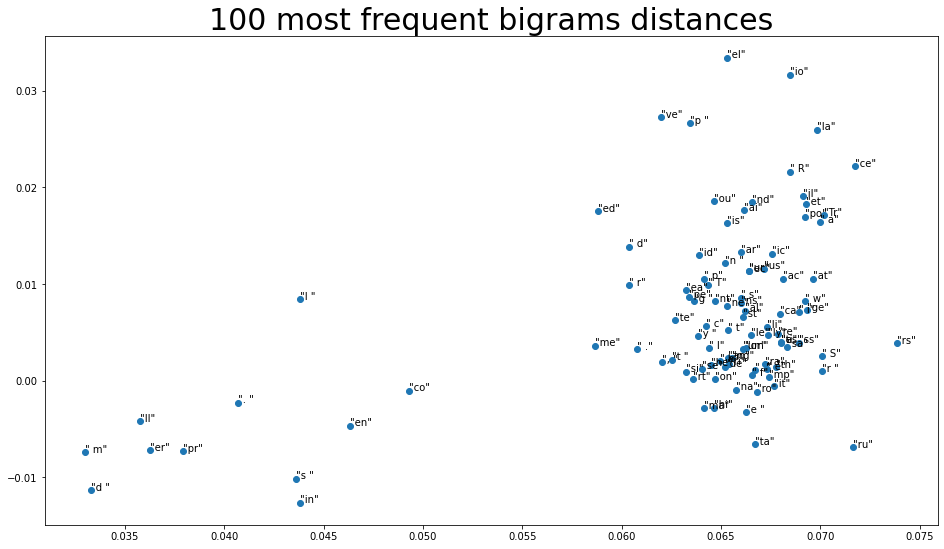

In [122]:
plt.rcParams["figure.figsize"] = [16,9]

plt.scatter(top_results[:, 0], top_results[:, 1])
words = top_bigrams
for i, word in enumerate(words):
    plt.annotate(word, xy=(top_results[i, 0], top_results[i, 1]))

plt.title('100 most frequent bigrams distances', fontsize=30)
plt.show()

In [125]:
vectorizer: TfidfVectorizer = pipeline.steps[0][1]
len(vectorizer.idf_)


4381